# CS818: Big Data Fundamentals

## Ross Leeper - 202469148

## Assignment notebook

#### Initial imports for data analysis

In [1]:
# initial imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Import dataset and verify against website info

Link given for dataset is: https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition

In [2]:
# import obesity data
obesity_df = pd.read_csv("assignment_dataset/ObesityDataSet_raw_and_data_sinthetic.csv")

In [3]:
obesity_df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


Check shape. Should be 17 columns (16 features and 1 target) and 2111 rows.

In [4]:
obesity_df.shape

(2111, 17)

Should be no missing values

In [5]:
obesity_df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

### Data Analysis and EDA

#### Column types and distributions

In [6]:
obesity_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

Split categorical columns and numerical for review

In [7]:
# Split categorical vs numerical using column names
cat_cols = obesity_df.select_dtypes(include=['object']).columns
num_cols = obesity_df.select_dtypes(include=['float64']).columns

Print unique values for each categorical column

In [8]:
# Check unique values
for c in cat_cols:
    print(" ")
    print(obesity_df[c].value_counts())

 
Gender
Male      1068
Female    1043
Name: count, dtype: int64
 
family_history_with_overweight
yes    1726
no      385
Name: count, dtype: int64
 
FAVC
yes    1866
no      245
Name: count, dtype: int64
 
CAEC
Sometimes     1765
Frequently     242
Always          53
no              51
Name: count, dtype: int64
 
SMOKE
no     2067
yes      44
Name: count, dtype: int64
 
SCC
no     2015
yes      96
Name: count, dtype: int64
 
CALC
Sometimes     1401
no             639
Frequently      70
Always           1
Name: count, dtype: int64
 
MTRANS
Public_Transportation    1580
Automobile                457
Walking                    56
Motorbike                  11
Bike                        7
Name: count, dtype: int64
 
NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64


<h3> Notes about categorical variables:</h3>

Gender
- Male, Female
- Almost equal between Male and Female

family_history_with_overweight / "Has a family member suffered or suffers from overweight?":
- yes, no
- Heavy yes skew

FAVC / "Do you eat high caloric food frequently?"
- yes, No
- Heavy yes skew

CAEC / "Do you eat any food between meals?"
- Sometimes, Frequently, Always, no
- Heavy Sometimes skew, small amount of frequently, around 50 each for always and no

SMOKE / "Do you smoke?"
- yes, no
- Heavy no skew

SCC / "Do you monitor the calories you eat daily?"
- yes, no
- Heavy no skew

CALC / "How often do you drink alcohol?"
- Sometimes, no, Frequently, Always
- Mostly Sometimes, some no, small amount of Frequently, 1 always

MTRANS / "Which transportation do you usually use?"
- Public_Transportation, Automobile, Walking, Motorbike, Bike
- Mostly Public_Transportation, some Automobile, very small amount of Walking, Motorbike, and Bike


<b> TARGET VARIABLE </b>

NObeyesdad / Obesity level
- Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II, and Obesity Type III
- Slightly more obesity type 1 and obesity type 3. Generally even otherwise.

Basic stats of numerical columns

In [9]:
# Basic stats
print(obesity_df[num_cols].describe())

               Age       Height       Weight         FCVC          NCP  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean     24.312600     1.701677    86.586058     2.419043     2.685628   
std       6.345968     0.093305    26.191172     0.533927     0.778039   
min      14.000000     1.450000    39.000000     1.000000     1.000000   
25%      19.947192     1.630000    65.473343     2.000000     2.658738   
50%      22.777890     1.700499    83.000000     2.385502     3.000000   
75%      26.000000     1.768464   107.430682     3.000000     3.000000   
max      61.000000     1.980000   173.000000     3.000000     4.000000   

              CH2O          FAF          TUE  
count  2111.000000  2111.000000  2111.000000  
mean      2.008011     1.010298     0.657866  
std       0.612953     0.850592     0.608927  
min       1.000000     0.000000     0.000000  
25%       1.584812     0.124505     0.000000  
50%       2.000000     1.000000     0.625350  
75% 

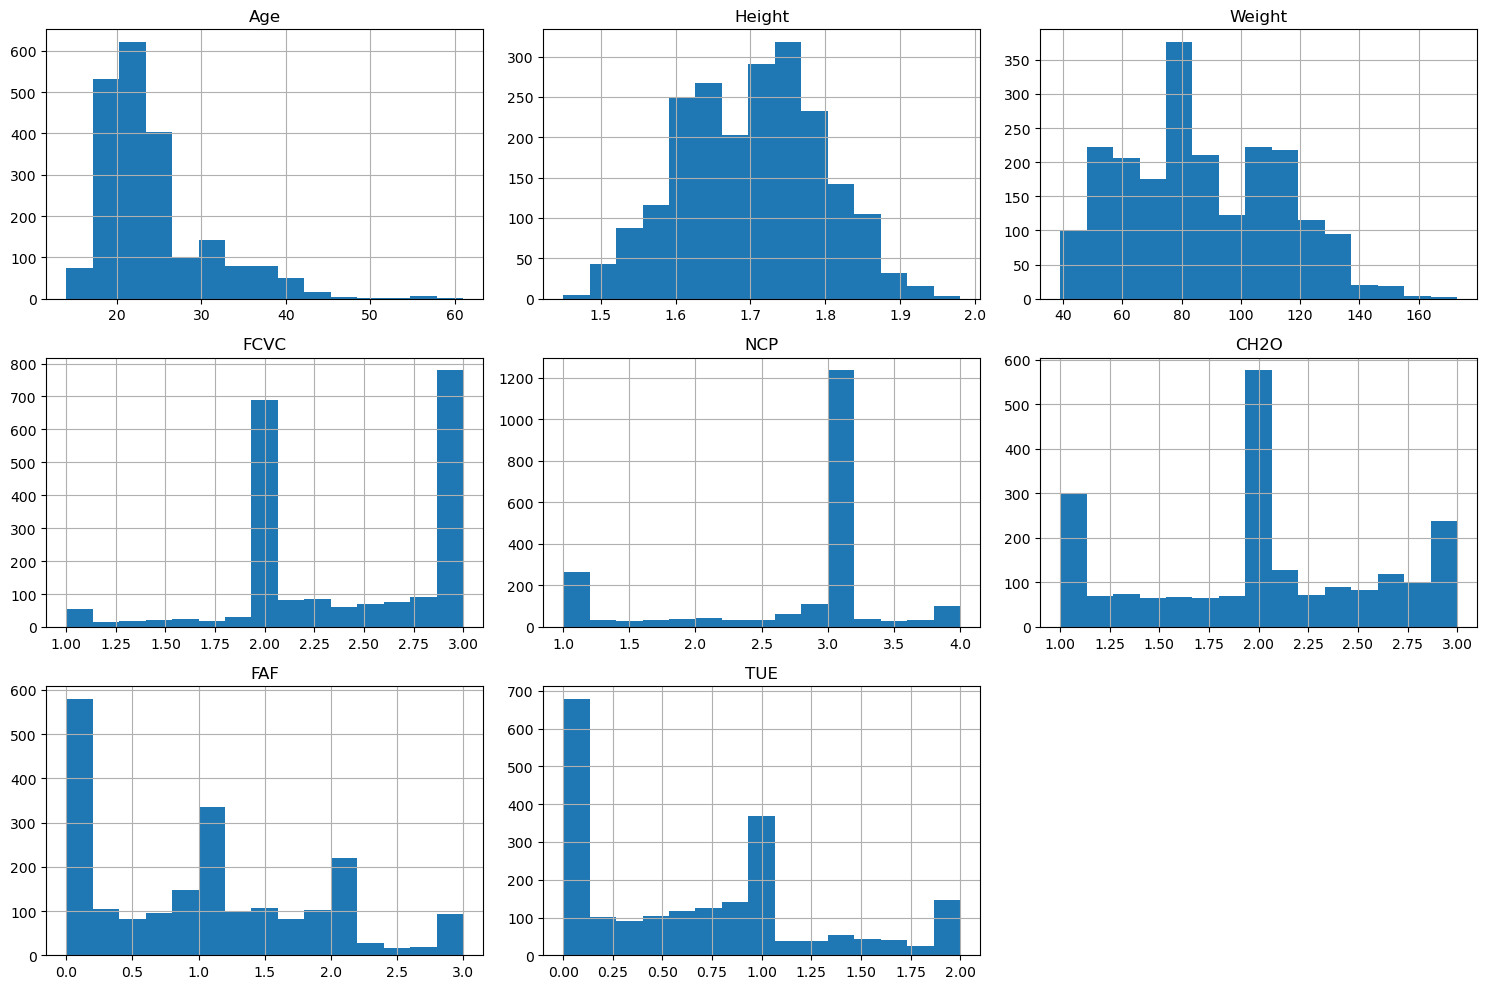

In [10]:
# Get plots of numerical columns distributions
obesity_df[num_cols].hist(figsize=(15, 10), bins=15)
plt.tight_layout()
plt.show()

<h3> Notes about numerical variables:</h3>

Age (Years)
- Min: 14.0, Max: 61.0, Mean: 24.3
- Skewed towards early 20s with long tail to 60

Height (Meters)
- Min: 1.45, Max: 1.98, Mean: 1.70
- Close to normal distribution

Weight (Kilograms)
- Min: 39, Max: 173, Mean: 86.6
- Left skewed witha big peak around 80kg

<b>The rest of the numerical variables are a mix of ordinal integers that are encodings of strings, and imputed values mixed in. The integer values are assumed from the dataset paper.</b>


FCVC / "Do you usually eat vegetables with your meals?"
- 1 = Never, 2 = Sometimes, 3 = Always

NCP / "How many main meals do you have daily?"
- Options: Between 1 & 2, Three, More than three
- This one is a little sstrange. The values range from 1 to 4 inclusive, but there are only 3 values from the survey. Maybe the meal number was inferred from the options?

CH20 / "How much water do you drink daily?"
- Options: 1 = Less than a liter, 2 = Between 1 and 2L, 3 = More than 2L
- Mostly 2

FAF / "How often do you have physical activity?" (per week)
- Options: 0 = I do not have, 1 = 1 or 2 days, 2 = 2 or 4 days, 3 = 4 or 5 days
- 0 is highest with a linear drop towards 3

TUE / "How much time do you use technological devices such as cell phone, videogames, television, computer and others?"
- Options: 0 = 0-2 hours, 1 = 3-5 hours, 2 = More than 5 hours
- 0 is highest with a linear drop towards 2

#### Bar graphs of strictly categorical variables

In [11]:
len(cat_cols)

9

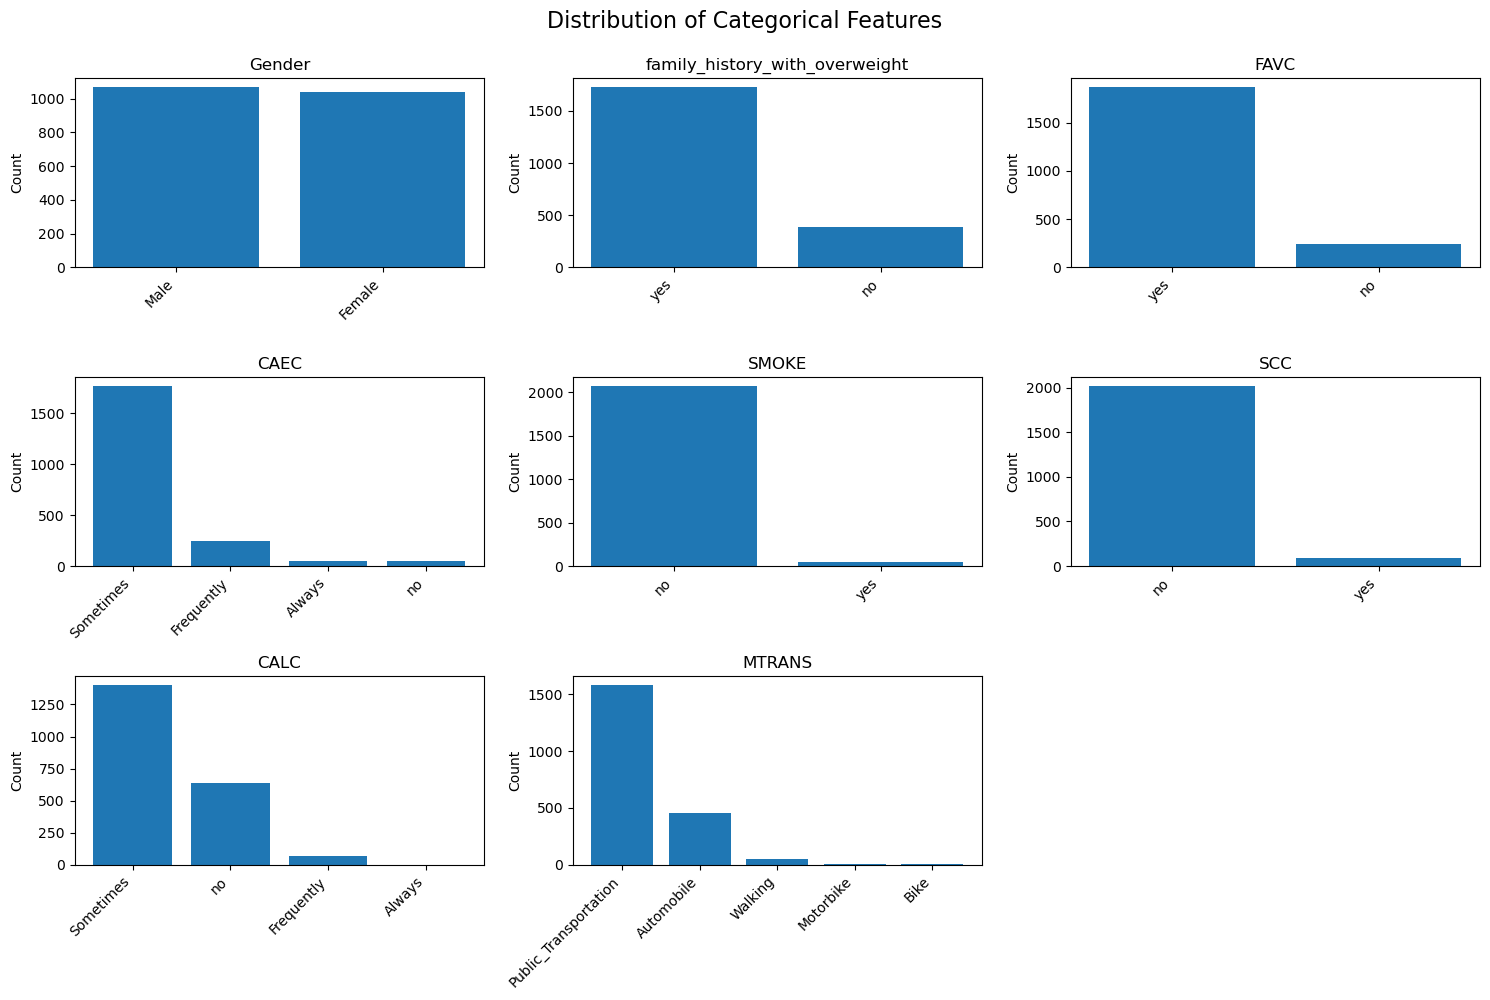

In [12]:
# Remove target from cat_cols
feat_cats = [col for col in cat_cols if col != 'NObeyesdad']

# Make 3x3 grid for subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
axes = axes.flatten()

# Plot each feature category in subplot
for idx, col in enumerate(feat_cats):
    counts = obesity_df[col].value_counts()
    axes[idx].bar(range(len(counts)), counts.values)
    axes[idx].set_xticks(range(len(counts)))
    axes[idx].set_xticklabels(counts.index, rotation=45, ha='right')   # rotate tick labels - looks strange otherwise
    axes[idx].set_title(f'{col}')
    axes[idx].set_ylabel('Count')

# Add overall title
fig.suptitle('Distribution of Categorical Features', fontsize=16, y=0.995)

# Hide the empty subplot
axes[8].set_visible(False)

# Tight layout has better spacing?
plt.tight_layout()
plt.show()

#### Bar graph for target variable

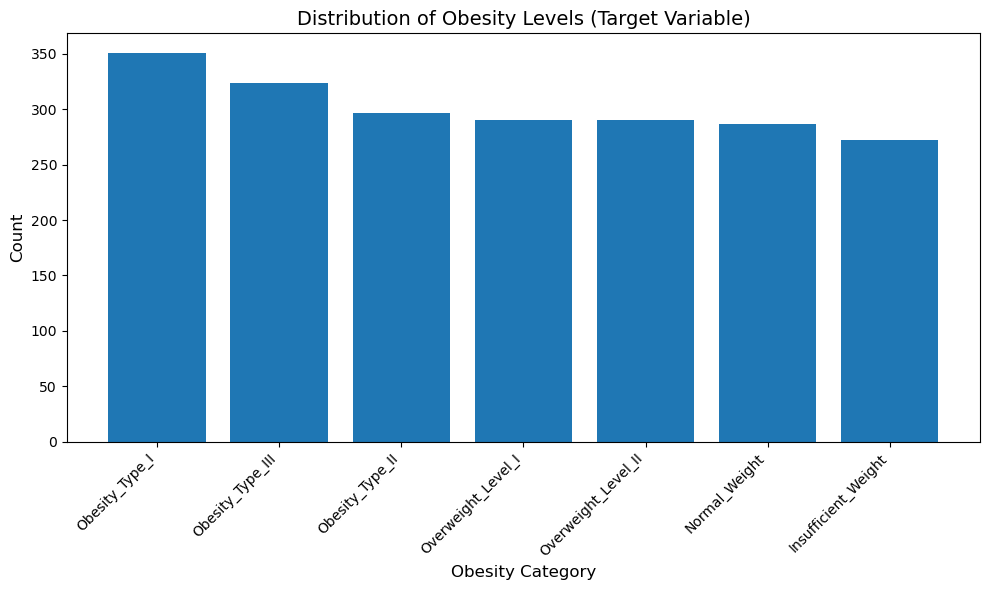

In [13]:
# Target variable on its own - larger for visibility
fig, ax = plt.subplots(figsize=(10, 6))

target_counts = obesity_df['NObeyesdad'].value_counts()
ax.bar(range(len(target_counts)), target_counts.values)
ax.set_xticks(range(len(target_counts)))
ax.set_xticklabels(target_counts.index, rotation=45, ha='right')
ax.set_title('Distribution of Obesity Levels (Target Variable)', fontsize=14)
ax.set_ylabel('Count', fontsize=12)
ax.set_xlabel('Obesity Category', fontsize=12)

plt.tight_layout()
plt.show()

#### Correlation Analysis

We need to encode the ordinal categorical variables to allow us to look correlations

In [14]:
# Cpy for correlation analysis
corr_df = obesity_df.copy()

In [15]:
# binary variables encoding
binary_map = {'yes':1, 'no':0}
corr_df['family_history_with_overweight'] = corr_df['family_history_with_overweight'].map(binary_map)
corr_df['FAVC'] = corr_df['FAVC'].map(binary_map)
corr_df['SMOKE'] = corr_df['SMOKE'].map(binary_map)
corr_df['SCC'] = corr_df['SCC'].map(binary_map)

In [16]:
# Ordinal frequency variables - unique values check
print("CAEC values:", corr_df['CAEC'].unique())
print("CALC values:", corr_df['CALC'].unique())
print("NObeyesdad values:", corr_df['NObeyesdad'].unique())

CAEC values: ['Sometimes' 'Frequently' 'Always' 'no']
CALC values: ['no' 'Sometimes' 'Frequently' 'Always']
NObeyesdad values: ['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']


In [17]:
print(type(corr_df['CAEC'].iloc[0]))

<class 'str'>


In [18]:
# ordinal frequency variables encoding
corr_df['CAEC'] = corr_df['CAEC'].map({'no':0, 'Sometimes':1, 'Frequently':2, 'Always':3})
corr_df['CALC'] = corr_df['CALC'].map({'no':0, 'Sometimes':1, 'Frequently':2, 'Always':3})

# target variable
corr_df['NObeyesdad'] = corr_df['NObeyesdad'].map({
    'Insufficient_Weight':0,
    'Normal_Weight':1,
    'Overweight_Level_I':2,
    'Overweight_Level_II':3,
    'Obesity_Type_I':4,
    'Obesity_Type_II':5,
    'Obesity_Type_III':6
})

In [19]:
# Check for mapping issues
print(corr_df[['CAEC', 'CALC', 'NObeyesdad']].isnull().sum())

# Check encoding worked
print(corr_df['NObeyesdad'].value_counts().sort_index())

CAEC          0
CALC          0
NObeyesdad    0
dtype: int64
NObeyesdad
0    272
1    287
2    290
3    290
4    351
5    297
6    324
Name: count, dtype: int64


In [20]:
corr_df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,1,0,2.0,3.0,1,0,2.000000,0,0.000000,1.000000,0,Public_Transportation,1
1,Female,21.000000,1.520000,56.000000,1,0,3.0,3.0,1,1,3.000000,1,3.000000,0.000000,1,Public_Transportation,1
2,Male,23.000000,1.800000,77.000000,1,0,2.0,3.0,1,0,2.000000,0,2.000000,1.000000,2,Public_Transportation,1
3,Male,27.000000,1.800000,87.000000,0,0,3.0,3.0,1,0,2.000000,0,2.000000,0.000000,2,Walking,2
4,Male,22.000000,1.780000,89.800000,0,0,2.0,1.0,1,0,2.000000,0,0.000000,0.000000,1,Public_Transportation,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,1,1,3.0,3.0,1,0,1.728139,0,1.676269,0.906247,1,Public_Transportation,6
2107,Female,21.982942,1.748584,133.742943,1,1,3.0,3.0,1,0,2.005130,0,1.341390,0.599270,1,Public_Transportation,6
2108,Female,22.524036,1.752206,133.689352,1,1,3.0,3.0,1,0,2.054193,0,1.414209,0.646288,1,Public_Transportation,6
2109,Female,24.361936,1.739450,133.346641,1,1,3.0,3.0,1,0,2.852339,0,1.139107,0.586035,1,Public_Transportation,6


Plot correlation matrix

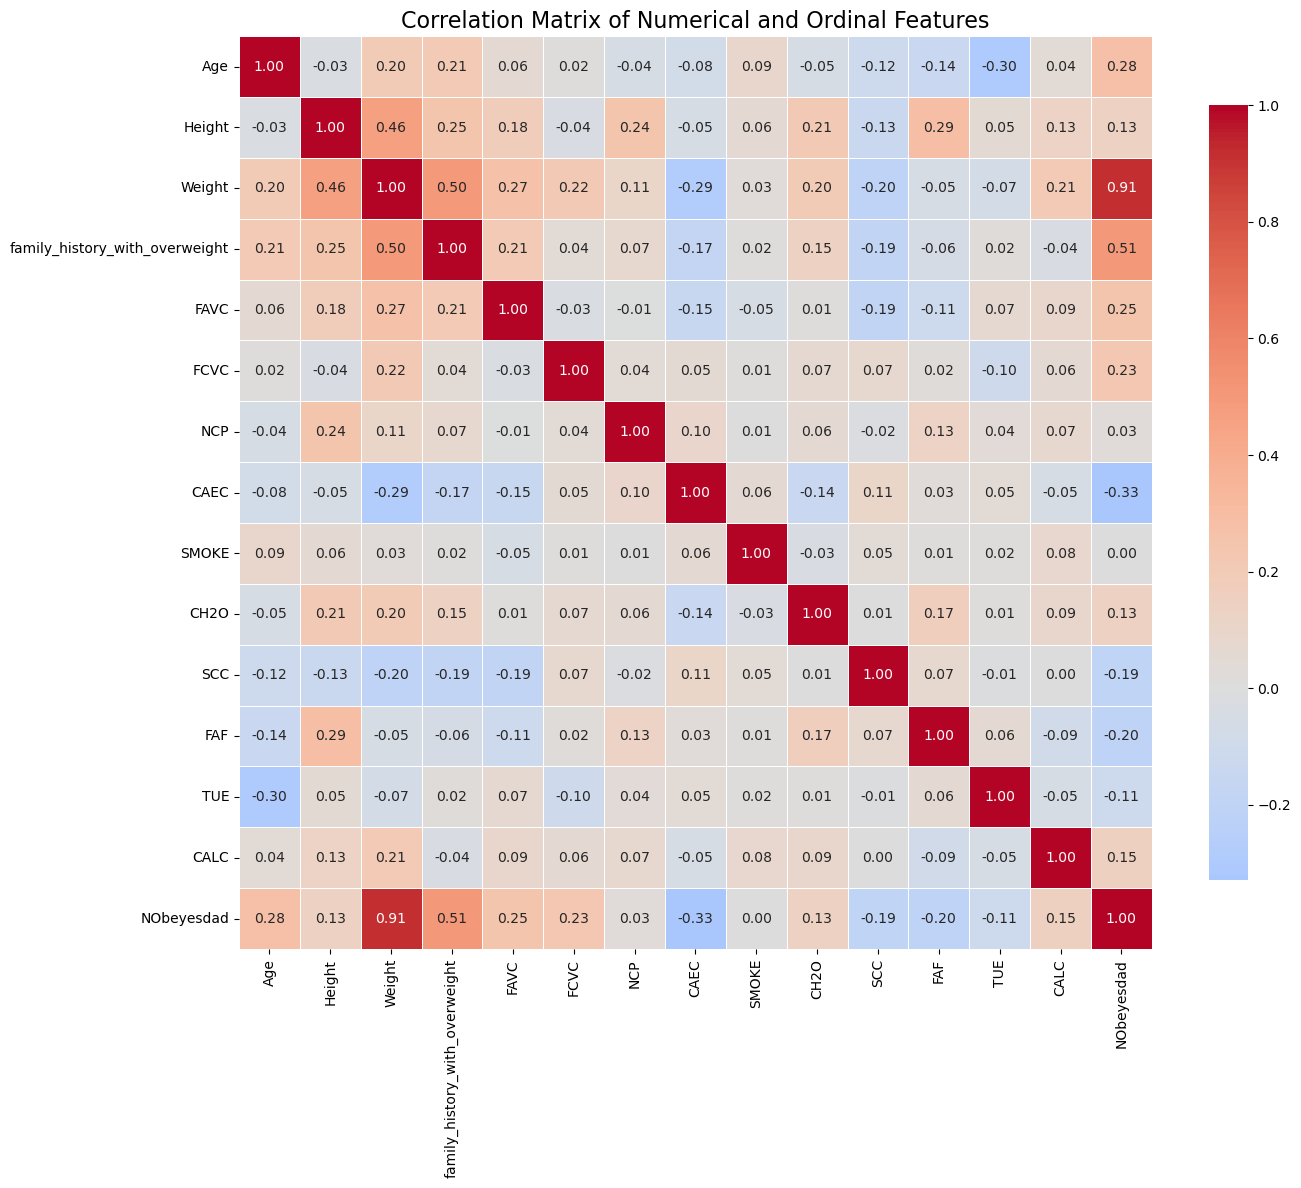

In [23]:
# Select only columns for correlation (exclude Gender and MTRANS)
corr_cols = [c for c in corr_df.columns if c not in ['Gender', 'MTRANS']]
correlation_matrix = corr_df[corr_cols].corr()

# Create heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix,
            annot=True,  # Show correlation values
            fmt='.2f',   # 2 decimal places
            cmap='coolwarm',  # Color scheme
            center=0,    # Center colormap at 0
            square=True,  # Square cells
            linewidths=0.5,
            cbar_kws={"shrink": 0.8})

plt.title('Correlation Matrix of Numerical and Ordinal Features', fontsize=16)
plt.tight_layout()
plt.show()

### Unsupervised Learning

### Supervised Learning